In [1]:
# Import necessary libraries
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when, isnull, countDistinct, date_format, to_date
from kedro.io import DataCatalog
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
%load_ext kedro.ipython

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [3]:
# Load datasets
encounters_df = catalog.load("encounters")
print("encounters data loaded..")

                    INFO     Loading data from encounters (SparkDataset)...                     ]8;id=447673;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=6141;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/io/data_catalog.py#508\508]8;;\

encounters data loaded..


In [3]:
encounters_df = catalog.load("healthcare_master")

[07/21/24 18:31:29] INFO     Loading data from healthcare_master (SparkDataset)...              ]8;id=178103;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=827278;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#508\508]8;;\

In [4]:
# 1. Display Basic Information
def basic_info(df):
    print("Dataset Schema:")
    df.printSchema()
    
    print("\nDataset Count:")
    print("Total Records:", df.count())
    
    print("\nColumn Names and Types:")
    for col in df.columns:
        print(f"{col}: {df.schema[col].dataType}")

basic_info(encounters_df)

Dataset Schema:
root
 |-- patient_id: string (nullable = true)
 |-- birth_date: date (nullable = true)
 |-- social_security_number: string (nullable = true)
 |-- driversLicense: string (nullable = true)
 |-- passport: string (nullable = true)
 |-- prefix: string (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- suffix: string (nullable = true)
 |-- maiden_name: string (nullable = true)
 |-- marital_status: string (nullable = true)
 |-- race: string (nullable = true)
 |-- ethnicity: string (nullable = true)
 |-- birthPlace: string (nullable = true)
 |-- address: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- county: string (nullable = true)
 |-- Fips: integer (nullable = true)
 |-- zip_code: integer (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- healthcare_expenses: double (nullable = true)
 |-- healthcare_coverage: doub

In [5]:
# 2. Summary Statistics
def summary_statistics(df):
    print("\nSummary Statistics:")
    df.describe().show()
    
    print("\nCount of Unique Values:")
    unique_counts = df.select([countDistinct(c).alias(c) for c in df.columns])
    unique_counts.show()

summary_statistics(encounters_df)


Summary Statistics:


24/07/21 18:41:55 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+--------------------+----------------------+--------------+---------+------+----------+---------+------+-----------+--------------+-----+-----------+------------------+--------------------+-------+---------+---------------+-----------------+------------------+--------------------+------------------+-------------------+-------------------+------------------+------------------+------+-------------------+------------------+------------------+-------------------+------------------+-----------------+-------------+-------------+---------------+-----------+------------------+--------------------+--------------------+------------------+----------------------+------------------+--------------+---------+------------------+--------------------+-------------------+------------+--------------------+------------------+------------+--------+-----+--------------+----+-----------+-----------+--------------+-------------+-----------------+------------------------+
|summary|          patient_id|

+----------+----------+----------------------+--------------+--------+------+----------+---------+------+-----------+--------------+----+---------+----------+-------+----+-----+------+----+--------+--------+---------+-------------------+-------------------+------+---+------+---------+------------+-------------+-------------------+----------------+--------------+-------------+-------------+---------------+-----------+------------------+----------------+---------------+--------+----------------+---------------+----------------------+---------+--------------+---------+----------+-----------+------------------+------------+--------------------+------------------+------------+--------+-----+--------------+----+-----------+-----------+--------------+-------------+-----------------+------------------------+
|patient_id|birth_date|social_security_number|driversLicense|passport|prefix|first_name|last_name|suffix|maiden_name|marital_status|race|ethnicity|birthPlace|address|city|state|county|Fips


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/opt/anaconda3/envs/kedro-environment/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/anaconda3/envs/kedro-environment/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/traitlets/config/application.

AttributeError: _ARRAY_API not found

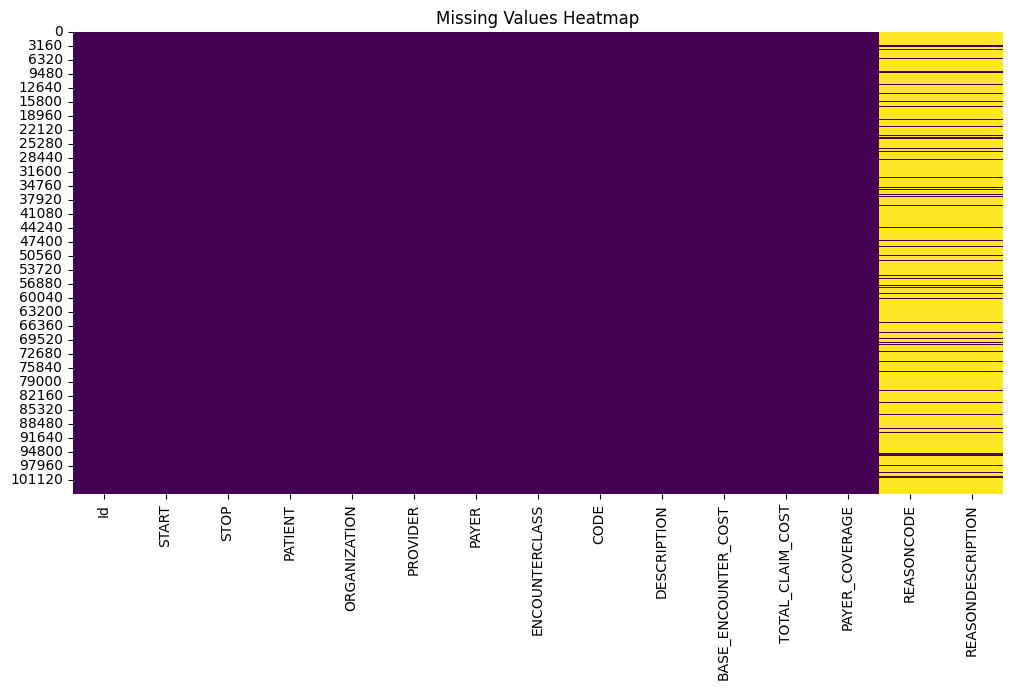


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/opt/anaconda3/envs/kedro-environment/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/anaconda3/envs/kedro-environment/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/traitlets/config/application.

AttributeError: _ARRAY_API not found

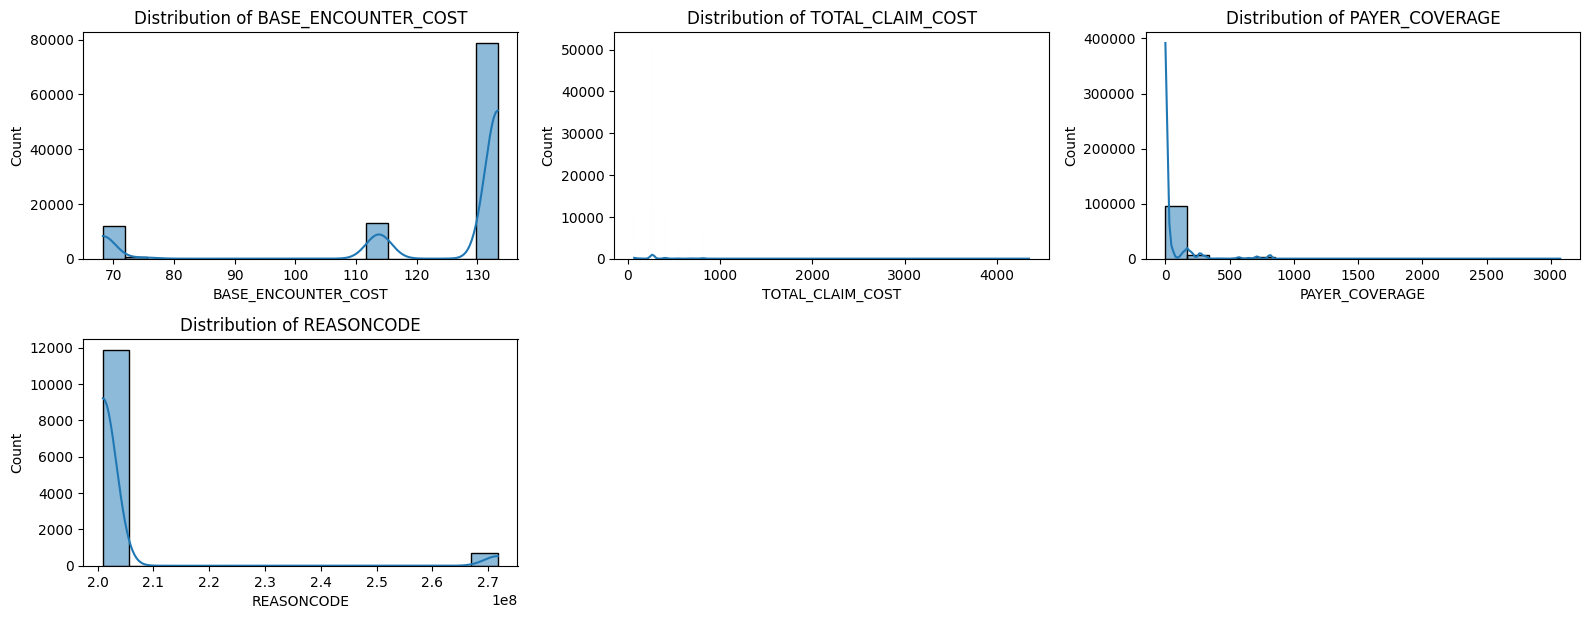


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/opt/anaconda3/envs/kedro-environment/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/anaconda3/envs/kedro-environment/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/traitlets/config/application.

AttributeError: _ARRAY_API not found

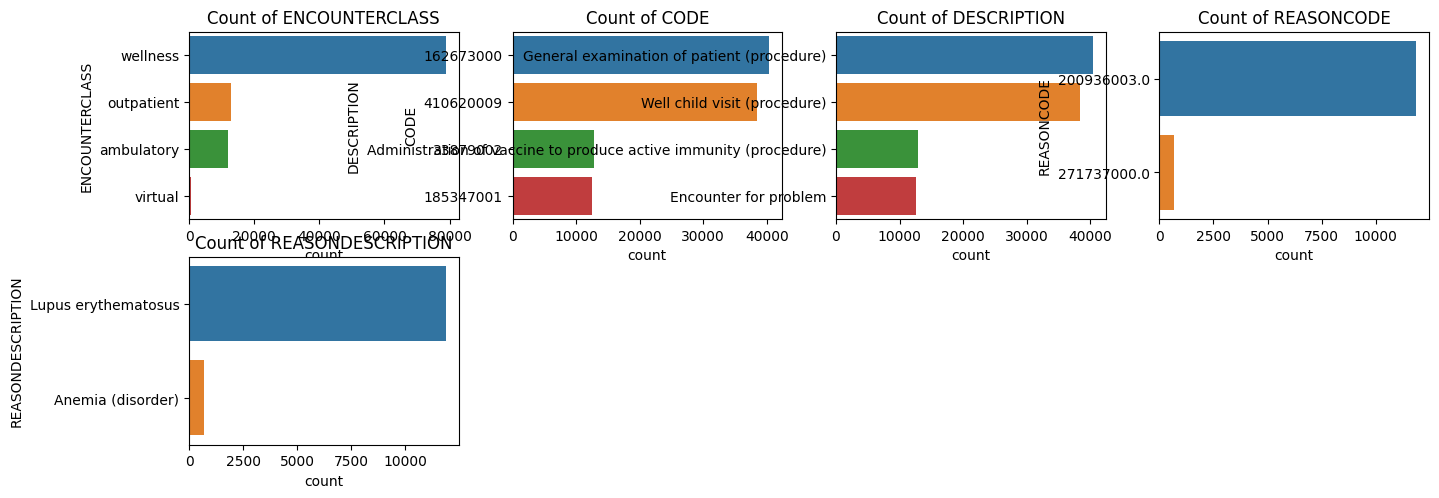


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/opt/anaconda3/envs/kedro-environment/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/anaconda3/envs/kedro-environment/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/traitlets/config/application.

AttributeError: _ARRAY_API not found

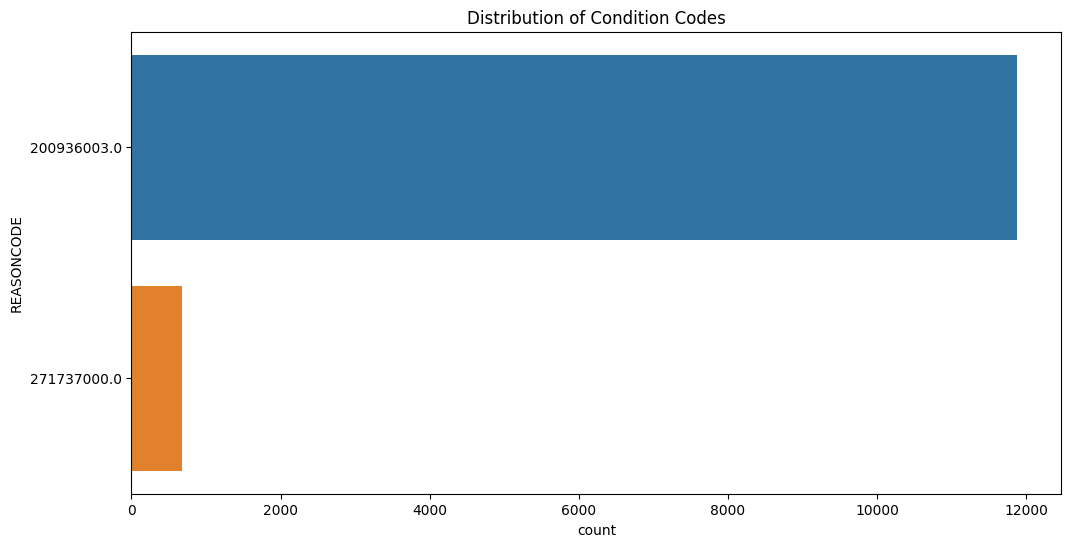


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/opt/anaconda3/envs/kedro-environment/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/anaconda3/envs/kedro-environment/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/traitlets/config/application.

AttributeError: _ARRAY_API not found

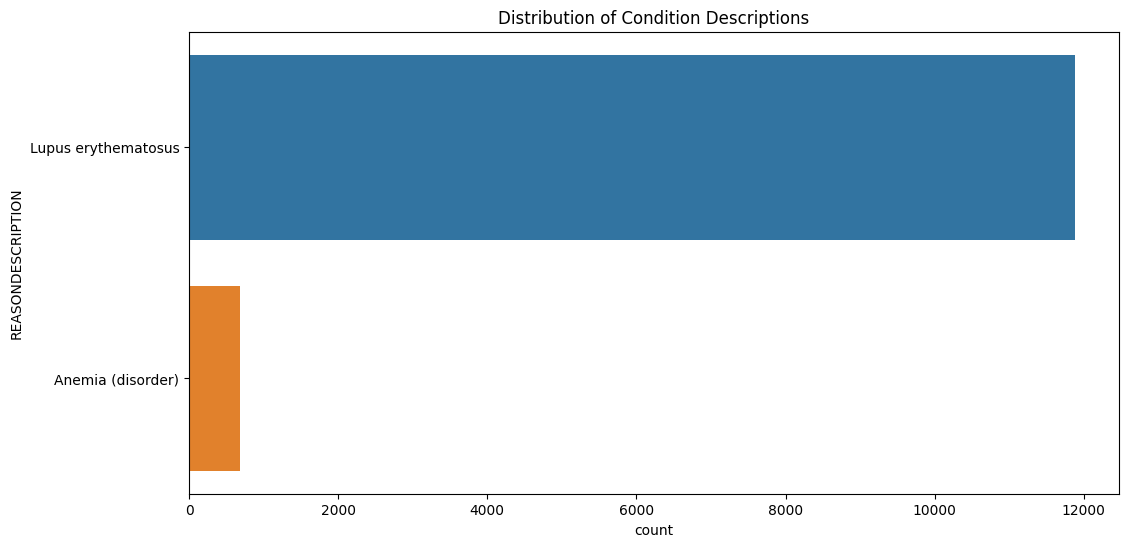


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/opt/anaconda3/envs/kedro-environment/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/anaconda3/envs/kedro-environment/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/traitlets/config/application.

AttributeError: _ARRAY_API not found

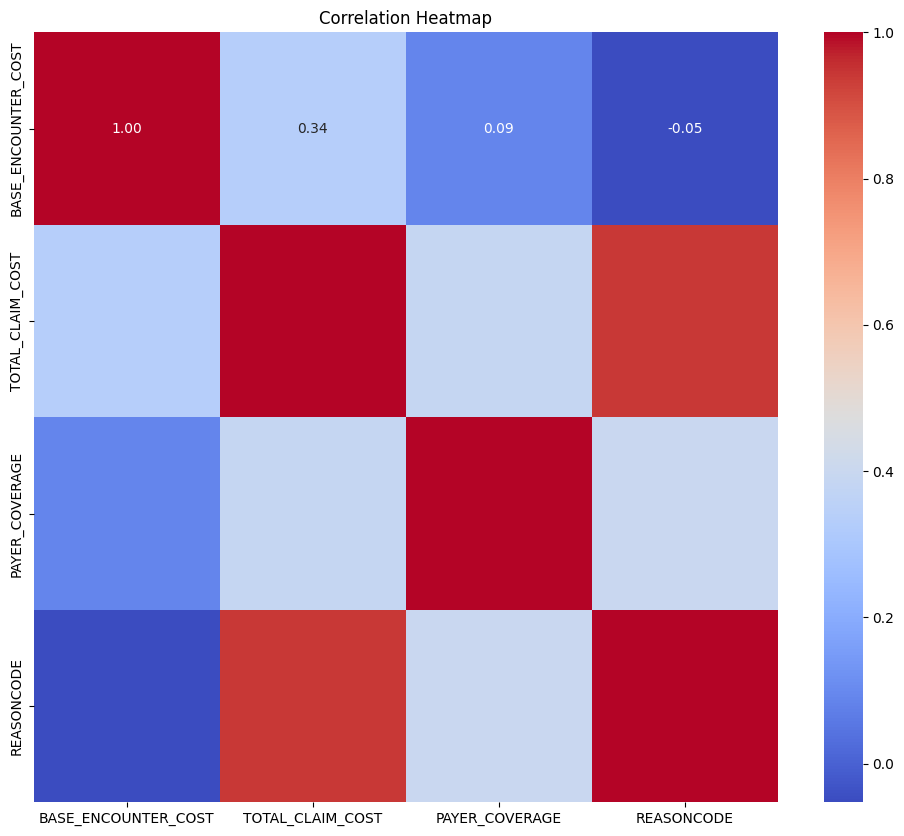

In [6]:
from pyspark.sql.types import DoubleType, IntegerType

# 3. Visualizations

# Missing Values Heatmap
def plot_missing_values(df):
    pdf = df.toPandas()
    plt.figure(figsize=(12, 6))
    sns.heatmap(pdf.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()

plot_missing_values(encounters_df)

# Distribution of Numerical Columns
def plot_histograms(df):
    numerical_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, (DoubleType, IntegerType))]
    
    pdf = df.toPandas()
    
    plt.figure(figsize=(16, 12))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(4, 3, i)
        sns.histplot(pdf[col].dropna(), kde=True)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

plot_histograms(encounters_df)

# Count of Categorical Columns
def plot_categorical_counts(df):
    categorical_cols = ['ENCOUNTERCLASS', 'CODE', 'DESCRIPTION', 'REASONCODE', 'REASONDESCRIPTION']
    
    pdf = df.toPandas()
    
    plt.figure(figsize=(16, 20))
    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(7, 4, i)
        sns.countplot(y=pdf[col], order=pdf[col].value_counts().index)
        plt.title(f'Count of {col}')
    plt.tight_layout()
    plt.show()

plot_categorical_counts(encounters_df)

# Condition Codes Distribution
def plot_condition_codes(df):
    pdf = df.toPandas()
    plt.figure(figsize=(12, 6))
    sns.countplot(y=pdf['REASONCODE'], order=pdf['REASONCODE'].value_counts().index)
    plt.title('Distribution of Condition Codes')
    plt.show()

plot_condition_codes(encounters_df)

# Condition Descriptions Distribution
def plot_condition_descriptions(df):
    pdf = df.toPandas()
    plt.figure(figsize=(12, 6))
    sns.countplot(y=pdf['REASONDESCRIPTION'], order=pdf['REASONDESCRIPTION'].value_counts().index)
    plt.title('Distribution of Condition Descriptions')
    plt.show()

plot_condition_descriptions(encounters_df)

# Correlation Heatmap
def plot_correlation_heatmap(df):
    numerical_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, (DoubleType, IntegerType))]
    
    pdf = df.select(numerical_cols).toPandas()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(pdf.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(encounters_df)



In [7]:
# Summary of Issues
def summary_of_issues(df):
    # Missing Values
    missing_df = df.select([count(when(isnull(c), c)).alias(c) for c in df.columns])
    print("\nMissing Values:")
    missing_df.show()
    
    # Duplicate Records
    duplicate_count = df.count() - df.dropDuplicates().count()
    print("\nDuplicate Records:", duplicate_count)
    
    # Unrealistic or Missing Dates
    df = df.withColumn('START', to_date(col('START')))
    df = df.withColumn('STOP', to_date(col('STOP')))
    
    print("\nUnrealistic or Missing Dates:")
    df.filter(col('START').isNull() | col('STOP').isNull()).show()

summary_of_issues(encounters_df)


Missing Values:
+---+-----+----+-------+------------+--------+-----+--------------+----+-----------+-------------------+----------------+--------------+----------+-----------------+
| Id|START|STOP|PATIENT|ORGANIZATION|PROVIDER|PAYER|ENCOUNTERCLASS|CODE|DESCRIPTION|BASE_ENCOUNTER_COST|TOTAL_CLAIM_COST|PAYER_COVERAGE|REASONCODE|REASONDESCRIPTION|
+---+-----+----+-------+------------+--------+-----+--------------+----+-----------+-------------------+----------------+--------------+----------+-----------------+
|  0|    0|   0|      0|           0|       0|    0|             0|   0|          0|                  0|               0|             0|     91705|            91705|
+---+-----+----+-------+------------+--------+-----+--------------+----+-----------+-------------------+----------------+--------------+----------+-----------------+




Duplicate Records: 0

Unrealistic or Missing Dates:
+---+-----+----+-------+------------+--------+-----+--------------+----+-----------+-------------------+----------------+--------------+----------+-----------------+
| Id|START|STOP|PATIENT|ORGANIZATION|PROVIDER|PAYER|ENCOUNTERCLASS|CODE|DESCRIPTION|BASE_ENCOUNTER_COST|TOTAL_CLAIM_COST|PAYER_COVERAGE|REASONCODE|REASONDESCRIPTION|
+---+-----+----+-------+------------+--------+-----+--------------+----+-----------+-------------------+----------------+--------------+----------+-----------------+
+---+-----+----+-------+------------+--------+-----+--------------+----+-----------+-------------------+----------------+--------------+----------+-----------------+



In [26]:
# Load datasets
encounters_df = catalog.load("encounters")
print("encounters data loaded..")

[07/20/24 16:16:14] INFO     Loading data from encounters (SparkDataset)...                     ]8;id=328640;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=293988;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#508\508]8;;\

encounters data loaded..


In [4]:
from pyspark.sql.types import DateType
# Count and remove duplicate records
duplicate_count = encounters_df.agg({"Id": "count"}).collect()[0][0] - encounters_df.dropDuplicates(["Id"]).agg({"Id": "count"}).collect()[0][0]
encounters_df_cleaned = encounters_df.dropDuplicates(["Id"])

# Rename columns based on definitions
encounters_df_cleaned = encounters_df.withColumnRenamed("Id", "encounter_id") \
                                      .withColumnRenamed("PATIENT", "patient_id") \
                                      .withColumnRenamed("ENCOUNTERCLASS", "encounter_type") \
                                      .withColumnRenamed("START", "encounter_start_date") \
                                      .withColumnRenamed("STOP", "encounter_end_date") \
                                      .withColumnRenamed("ORGANIZATION", "organization") \
                                      .withColumnRenamed("PROVIDER", "provider") \
                                      .withColumnRenamed("PAYER", "payer") \
                                      .withColumnRenamed("CODE", "code") \
                                      .withColumnRenamed("DESCRIPTION", "description") \
                                      .withColumnRenamed("BASE_ENCOUNTER_COST", "paid_amount") \
                                      .withColumnRenamed("TOTAL_CLAIM_COST", "allowed_amount") \
                                      .withColumnRenamed("PAYER_COVERAGE", "charge_amount") \
                                      .withColumnRenamed("REASONCODE", "admit_source_code") \
                                      .withColumnRenamed("REASONDESCRIPTION", "admit_source_description")

# Convert START and STOP columns to date format
encounters_df_cleaned = encounters_df_cleaned.withColumn("encounter_start_date", col("encounter_start_date").cast(DateType()))
encounters_df_cleaned = encounters_df_cleaned.withColumn("encounter_end_date", col("encounter_end_date").cast(DateType()))

# Remove columns with all null values (if any)
encounters_df_cleaned = encounters_df_cleaned.dropna(how='all')

# Remove outliers for BASE_ENCOUNTER_COST and TOTAL_CLAIM_COST using IQR
def remove_outliers(df, column_name):
    quantiles = df.approxQuantile(column_name, [0.25, 0.75], 0.01)
    Q1, Q3 = quantiles[0], quantiles[1]
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df.filter((col(column_name) >= lower_bound) & (col(column_name) <= upper_bound))

# encounters_df_cleaned = remove_outliers(encounters_df_cleaned, "BASE_ENCOUNTER_COST")
encounters_df_cleaned = remove_outliers(encounters_df_cleaned, "allowed_amount")

# Calculate the number of records after cleaning
final_record_count = encounters_df_cleaned.count()

# Summary
summary = {
    'total_records': encounters_df.count(),
    'duplicate_records': duplicate_count,
    'outliers_removed': encounters_df.count() - final_record_count,
    'final_record_count': final_record_count
}

print(summary)

{'total_records': 104262, 'duplicate_records': 0, 'outliers_removed': 39760, 'final_record_count': 64502}


In [29]:
joined_patients = catalog.load("joined_patients@spark")
print("conditions data loaded..")
master_spark_df = joined_patients.join(encounters_df_cleaned, on='patient_id', how='left')
print("Left-",master_spark_df.count()) 
master_spark_df = joined_patients.join(encounters_df_cleaned, on='patient_id', how='inner')
print("Inner-",master_spark_df.count()) 

[07/20/24 16:17:36] INFO     Loading data from joined_patients@spark (SparkDataset)...          ]8;id=215616;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=597637;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#508\508]8;;\

conditions data loaded..
Left- 9710
Inner- 0


In [34]:
joined_patients = catalog.load("joined_patients@spark")
print("conditions data loaded..")
print(joined_patients)

[07/20/24 16:28:59] INFO     Loading data from joined_patients@spark (SparkDataset)...          ]8;id=910163;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=617186;file:///opt/anaconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#508\508]8;;\

conditions data loaded..
DataFrame[patient_id: string, birth_date: date, social_security_number: string, driversLicense: string, passport: string, prefix: string, first_name: string, last_name: string, suffix: string, maiden_name: string, marital_status: string, race: string, ethnicity: string, birthPlace: string, address: string, city: string, state: string, county: string, Fips: int, zip_code: int, latitude: double, longitude: double, healthcare_expenses: double, healthcare_coverage: double, income: int, age: double, GENDER: string]
